<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/slave/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [0]:
train_path="/content/train.csv"
test_path="/content/test.csv"
X_train=pd.read_csv(train_path)
X_test=pd.read_csv(test_path)
y_train=X_train['Loan_Status']
#y_test=X_test['Loan_Status']
X_train.drop(['Loan_Status'],axis=1,inplace=True)
#X_test.drop(['Loan_Status'],axis=1,inplace=True)

In [6]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [7]:
X_test.shape

(367, 12)

In [8]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
X_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [10]:
X_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
X_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [12]:
X_train.shape

(614, 12)

In [0]:
X_gender_train=pd.get_dummies(X_train['Gender'])
X_married_train=pd.get_dummies(X_train['Married'])
#X_education=pd.get_dummies(X_train['Education'])
X_Self_Employed_train=pd.get_dummies(X_train['Self_Employed'])
X_Property_Area_train=pd.get_dummies(X_train['Property_Area'])

In [0]:
X_gender_test=pd.get_dummies(X_test['Gender'])
X_married_test=pd.get_dummies(X_test['Married'])
#X_education=pd.get_dummies(X_train['Education'])
X_Self_Employed_test=pd.get_dummies(X_test['Self_Employed'])
X_Property_Area_test=pd.get_dummies(X_test['Property_Area'])

In [0]:
X_Self_Employed_train.rename(columns = {'No':'Self_Employed_No','Yes':'Self_Employed_yes'},inplace = True) 
X_married_train.rename(columns = {'No':'Married_No','Yes':'Married_yes'},inplace = True)

In [0]:
X_Self_Employed_test.rename(columns = {'No':'Self_Employed_No','Yes':'Self_Employed_yes'},inplace = True) 
X_married_test.rename(columns = {'No':'Married_No','Yes':'Married_yes'},inplace = True)

In [0]:
frames=[X_train,X_gender_train,X_married_train,X_Self_Employed_train,X_Property_Area_train]
X_new_train=pd.concat(frames,axis='columns')

In [0]:
frames=[X_test,X_gender_test,X_married_test,X_Self_Employed_test,X_Property_Area_test]
X_new_test=pd.concat(frames,axis='columns')

In [0]:
X_new_train.drop(['Loan_ID','Gender','Married','Self_Employed','Property_Area','Married_No','Self_Employed_No','Female','Urban'],axis=1,inplace=True)
X_new_test.drop(['Loan_ID','Gender','Married','Self_Employed','Property_Area','Married_No','Self_Employed_No','Female','Urban'],axis=1,inplace=True)

In [20]:
X_new_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
X_new_train['Dependents']=X_new_train['Dependents'].replace('3+','3')
X_new_test['Dependents']=X_new_test['Dependents'].replace('3+','3')

In [0]:
le=LabelEncoder()
X_new_train['Education']=le.fit_transform(X_new_train.Education)
X_new_train['Dependents']=X_new_train['Dependents'].apply(pd.to_numeric) 

X_new_test['Education']=le.fit_transform(X_new_test.Education)
X_new_test['Dependents']=X_new_test['Dependents'].apply(pd.to_numeric) 

y_train=le.fit_transform(y_train)
#X_new['Dependents']=le.fit_transform(X_new.Dependents)

In [24]:
X_new_train.dtypes

Dependents           float64
Education              int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Male                   uint8
Married_yes            uint8
Self_Employed_yes      uint8
Rural                  uint8
Semiurban              uint8
dtype: object

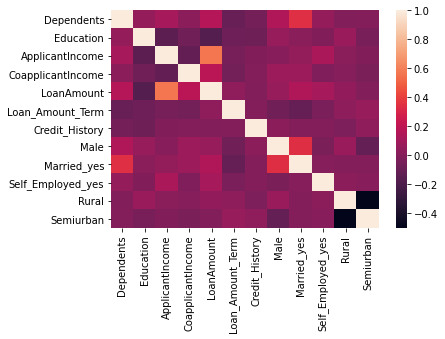

In [25]:
sns.heatmap(X_new_train.corr())

In [26]:
X_new_train.corr()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married_yes,Self_Employed_yes,Rural,Semiurban
Dependents,1.000000,0.059161,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.151526,0.343417,0.057888,-0.007359,0.002758
Education,0.059161,1.000000,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,0.061497,0.017671,-0.010383,0.077520,-0.039410
ApplicantIncome,0.118679,-0.140760,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.013933,0.050194,0.127180,0.015829,-0.014246
CoapplicantIncome,0.027259,-0.062290,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.082316,0.080496,-0.016100,0.005329,-0.027044
LoanAmount,0.163997,-0.171133,0.570909,0.188619,1.000000,0.039447,-0.008433,0.065501,0.148367,0.117421,0.043942,-0.008401
Loan_Amount_Term,-0.100484,-0.078784,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.071026,-0.104608,-0.034361,0.034827,0.061957
Credit_History,-0.050082,-0.081822,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.026349,0.001259,-0.002362,-0.020983,0.042414
Male,0.151526,0.061497,0.013933,0.082316,0.065501,-0.071026,0.026349,1.000000,0.339026,-0.027421,0.075128,-0.113069
Married_yes,0.343417,0.017671,0.050194,0.080496,0.148367,-0.104608,0.001259,0.339026,1.000000,0.008491,-0.000220,-0.000229
Self_Employed_yes,0.057888,-0.010383,0.127180,-0.016100,0.117421,-0.034361,-0.002362,-0.027421,0.008491,1.000000,0.022065,0.008710


In [27]:
X_new_train.isnull().sum()

Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Male                  0
Married_yes           0
Self_Employed_yes     0
Rural                 0
Semiurban             0
dtype: int64

In [0]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_new_train)
X_train_imputed=imputer.transform(X_new_train.values)

In [0]:
imputer.fit(X_new_test)
X_test_imputed=imputer.transform(X_new_test.values)

In [30]:
X_train_imputed

array([[0.000e+00, 0.000e+00, 5.849e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 4.583e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 3.000e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 8.072e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 0.000e+00, 7.583e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 4.583e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [31]:
X_new_train.isnull().sum()

Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Male                  0
Married_yes           0
Self_Employed_yes     0
Rural                 0
Semiurban             0
dtype: int64

In [32]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [33]:
Logistic_model=LogisticRegression()
Logistic_model.fit(X_train_imputed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict=Logistic_model.predict(X_test_imputed)

In [35]:
type(y_predict)

numpy.ndarray

In [0]:
y_predict=np.where(y_predict=='0', 'N', y_predict)
y_predict=np.where(y_predict=='1', 'Y', y_predict)

In [41]:
y_predict


array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [0]:
y_predict[1]

In [0]:
len(y_predict)

In [0]:
from openpyxl import *

In [0]:
submission_path="C:\\Users\\sagar\\Downloads\\Hackathon\\Loan_prediction\\sample_submission.csv"

wb=load_workbook(submission_path)
ws=wb['sample_submission']
for i in range(1,368):
    wcell=ws.cell(1,i)
    wcell.value=y_predict[i]

wb.save(submission_path)

In [42]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_imputed,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_predict_sfd=sgd_clf.predict(X_test_imputed)

In [44]:
y_predict_sfd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train_imputed,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [0]:
y_vote_predict=voting_clf.predict(X_test_imputed)

In [0]:
y_vote_predict=np.where(y_vote_predict=='0' ,'N', y_vote_predict)
y_vote_predict=np.where(y_vote_predict=='1', 'Y', y_vote_predict)

In [83]:
y_vote_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [84]:
for i in range(0,len(y_vote_predict)):
  print(y_vote_predict[i])

Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
N
Y
Y
Y
Y
N
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
N
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


In [85]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train_imputed,y_train)
  y_pred = clf.predict(X_test_imputed)
  print(clf)
  for i in y_pred:
    print(i)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

In [0]:
svm_clf = Pipeline((("scaler", StandardScaler()),("linear_svc", LinearSVC(C=2, loss="hinge"))))
svm_clf.fit(X_train_imputed,y_train)
Y_SVC=svm_clf.predict(X_test_imputed)

In [92]:
for i in range(0,len(Y_SVC)):
  print(Y_SVC[i])

1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
0
1
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1


In [97]:
polynomial_svm_clf = Pipeline((("poly_features", PolynomialFeatures(degree=8)),("scaler", StandardScaler()),("svm_clf", LinearSVC(C=100, loss="hinge"))))
polynomial_svm_clf.fit(X_train_imputed,y_train)
Y_SVC_mul=svm_clf.predict(X_test_imputed)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
